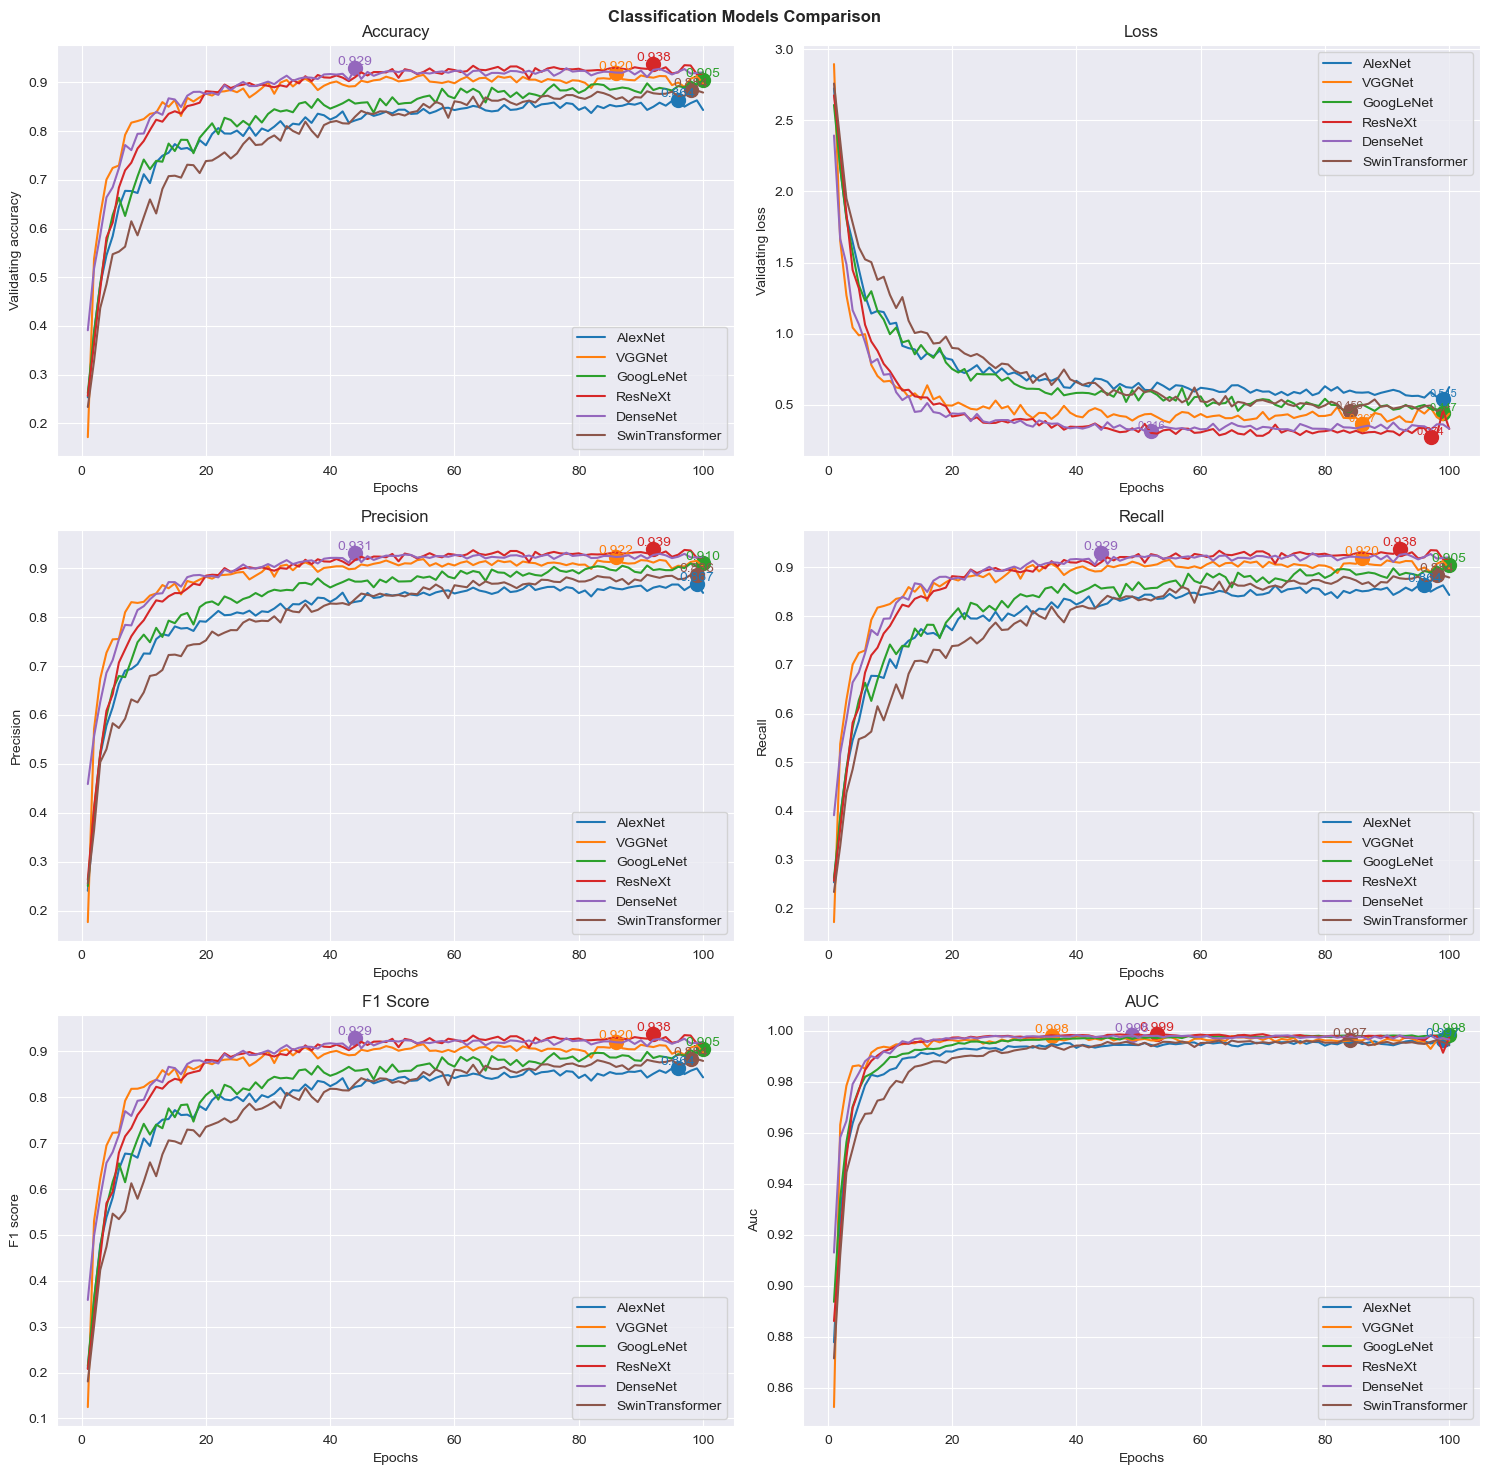

In [1]:
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style('darkgrid')

# 网络名称和日志文件路径
networks = ['AlexNet', 'VGGNet', 'GoogLeNet', 'ResNeXt', 'DenseNet', 'SwinTransformer']
log_files = [f'../{net}/{net}.log' for net in networks]

# 指标数据字典
metrics = {net: {
    "epoch": [],
    "validating_loss": [],
    "validating_accuracy": [],
    "precision": [],
    "recall": [],
    "f1_score": [],
    "auc": []
} for net in networks}

# 从日志文件中提取数据
for net, log_file in zip(networks, log_files):
    with open(log_file, 'r') as file:
        log_data = file.read()
        for line in log_data.splitlines():
            match = re.search(
                r'Epoch: (\d+), Training loss: ([\d.]+), Training accuracy: ([\d.]+), Validating loss: ([\d.]+), Validating accuracy: ([\d.]+), Precision: ([\d.]+), Recall: ([\d.]+), f1 score: ([\d.]+), auc: ([\d.]+)',
                line)
            if match:
                metrics[net]["epoch"].append(int(match.group(1)))
                metrics[net]["validating_loss"].append(float(match.group(4)))
                metrics[net]["validating_accuracy"].append(float(match.group(5)))
                metrics[net]["precision"].append(float(match.group(6)))
                metrics[net]["recall"].append(float(match.group(7)))
                metrics[net]["f1_score"].append(float(match.group(8)))
                metrics[net]["auc"].append(float(match.group(9)))

# 指标的名称和对应的键
indicators = ['validating_accuracy', 'validating_loss', 'precision', 'recall', 'f1_score', 'auc']
indicator_titles = ['Accuracy', 'Loss', 'Precision', 'Recall', 'F1 Score', 'AUC']

# 创建一个3行2列的子图布局
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

fig.suptitle('Classification Models Comparison', fontsize=12, fontweight='bold')

# 遍历每个指标，在每个子图中绘制所有网络的该指标曲线
for i, (indicator, title) in enumerate(zip(indicators, indicator_titles)):
    ax = axes[i // 2, i % 2]  # 选择子图位置
    for net in networks:
        x = np.array(metrics[net]["epoch"])
        y = np.array(metrics[net][indicator])

        ax.plot(x, y, label=net)

        if indicator == 'validating_loss':
            # 在损失图上标记最低点
            min_index = np.argmin(y)
            ax.scatter(x[min_index], y[min_index], color=ax.lines[-1].get_color(), s=100)  # 不加黑边
            ax.text(x[min_index], y[min_index], f'{y[min_index]:.3f}', 
                    fontsize=8, ha='center', va='bottom', color=ax.lines[-1].get_color())
        else:
            # 在其他图上标记最高点
            max_index = np.argmax(y)
            ax.scatter(x[max_index], y[max_index], color=ax.lines[-1].get_color(), s=100)  # 不加黑边
            ax.text(x[max_index], y[max_index], f'{y[max_index]:.3f}', 
                    fontsize=10, ha='center', va='bottom', color=ax.lines[-1].get_color())

    ax.set_title(title)
    ax.set_xlabel('Epochs')
    ax.set_ylabel(indicator.replace('_', ' ').capitalize())
    ax.legend()

# 调整布局
plt.tight_layout()

# 保存图片
plt.savefig('Network_Metrics_Comparison.png', dpi=1000)

# 显示图形
plt.show()
